In [1]:
import librosa


In [2]:
import warnings
warnings.simplefilter('ignore')
import nussl

In [3]:
# Let's download a file from the External File Zoo
input_file_path = nussl.efz_utils.download_audio_file('schoolboy_fascination_excerpt.wav')

Matching file found at /SFS/user/ry/stonekev/.nussl/audio/schoolboy_fascination_excerpt.wav, skipping download.


In [4]:
signal1 = nussl.AudioSignal(input_file_path)

In [5]:
_ = signal1.embed_audio()

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/SFS/user/ry/stonekev/miniconda3/envs/audio --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpo

In [6]:
print("Duration: {} seconds".format(signal1.signal_duration))
print("Duration in samples: {} samples".format(signal1.signal_length))
print("Number of channels: {} channels".format(signal1.num_channels))
print("File name: {}".format(signal1.file_name))
print("Full path to input: {}".format(signal1.path_to_input_file))
print("Root mean square energy: {:.4f}".format(signal1.rms().mean()))

Duration: 15.0 seconds
Duration in samples: 661500 samples
Number of channels: 2 channels
File name: schoolboy_fascination_excerpt.wav
Full path to input: /SFS/user/ry/stonekev/.nussl/audio/schoolboy_fascination_excerpt.wav
Root mean square energy: 0.1136


In [7]:
signal1.audio_data

array([[ 0.00213623, -0.04547119, -0.0513916 , ..., -0.24395752,
        -0.2310791 , -0.20785522],
       [-0.1791687 , -0.20150757, -0.20574951, ..., -0.23834229,
        -0.2156372 , -0.168396  ]], dtype=float32)

In [8]:
signal1.audio_data.shape

(2, 661500)

In [9]:
import numpy as np

sample_rate = 44100  # Hz
dt = 1.0 / sample_rate
dur = 2.0  # seconds
freq = 440  # Hz
x = np.arange(0.0, dur, dt)
x = np.sin(2 * np.pi * freq * x)

In [10]:
signal2 = nussl.AudioSignal(
    audio_data_array=x, sample_rate=sample_rate)
signal2.embed_audio()
print(signal2)

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/SFS/user/ry/stonekev/miniconda3/envs/audio --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpo

AudioSignal (unlabeled): 2.000 sec @ path unknown, 44100 Hz, 1 ch.


In [11]:
print(f"Default sample rate: {nussl.constants.DEFAULT_SAMPLE_RATE}")

Default sample rate: 44100


In [12]:
signal1.to_mono(overwrite=True)
signal1.truncate_seconds(signal2.signal_duration)

In [13]:
signal3 = signal1 + signal2
signal3.peak_normalize()
signal3.embed_audio()
print(signal3)

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/SFS/user/ry/stonekev/miniconda3/envs/audio --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpo

AudioSignal (unlabeled): 2.000 sec @ /SFS/user/ry/stonekev/.nussl/audio/schoolboy_fascination_excerpt.wav, 44100 Hz, 1 ch.


In [14]:
signal3.write_audio_to_file('/tmp/signal3.wav')

In [15]:
signal1 = nussl.AudioSignal(input_file_path)
print('STFT Data:', signal1.stft_data)

STFT Data: None


In [16]:
stft = signal1.stft()
print(stft.shape)

(1025, 1293, 2)


In [17]:
import librosa
def visualize_mel(audio_signal):
    ch = 0
    data = librosa.feature.melspectrogram(y=audio_signal.get_channel(ch), sr=audio_signal.sample_rate)
    data = librosa.amplitude_to_db(data, ref=np.max)
    librosa.display.specshow(data, x_axis='time', y_axis='linear', sr=audio_signal.sample_rate, hop_length=audio_signal.stft_params.hop_length)

In [20]:
import matplotlib
matplotlib.__version__

'3.2.0'

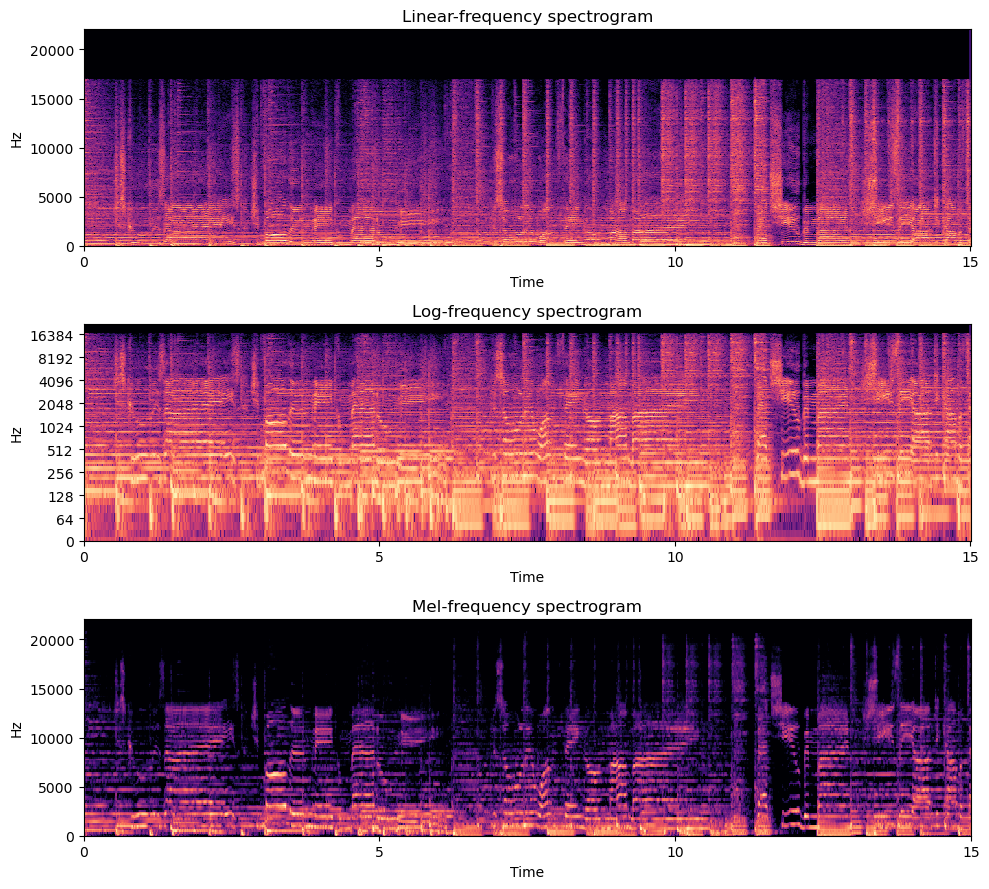

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 9))
plt.subplot(311)
plt.title('Linear-frequency spectrogram')
nussl.utils.visualize_spectrogram(signal1)

plt.subplot(312)
plt.title('Log-frequency spectrogram')
nussl.utils.visualize_spectrogram(signal1, y_axis='log')

plt.subplot(313)
plt.title('Mel-frequency spectrogram')
#nussl.utils.visualize_spectrogram(signal1, y_axis='mel', kwargs={})
visualize_mel(signal1)

plt.tight_layout()
plt.show()

In [21]:
import numpy as np

lp_stft = signal1.stft_data.copy()
lp_cutoff = 1000  # Hz
frequency_vector = signal1.freq_vector  # a vector of frequency values for each FFT bin
idx = (np.abs(frequency_vector - lp_cutoff)).argmin()  # trick to find the index of the closest value to lp_cutoff
lp_stft[idx:, :, :] = 0.0j  # every freq above lp_cutoff is 0 now

In [22]:
signal1_lp = signal1.make_copy_with_stft_data(lp_stft)
print('Audio Data:', signal1_lp.audio_data)

Audio Data: None


In [23]:
signal1_lp.istft()
signal1_lp.embed_audio()
print(signal1_lp)

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/SFS/user/ry/stonekev/miniconda3/envs/audio --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpo

AudioSignal (unlabeled): 15.000 sec @ /SFS/user/ry/stonekev/.nussl/audio/schoolboy_fascination_excerpt.wav, 44100 Hz, 2 ch.


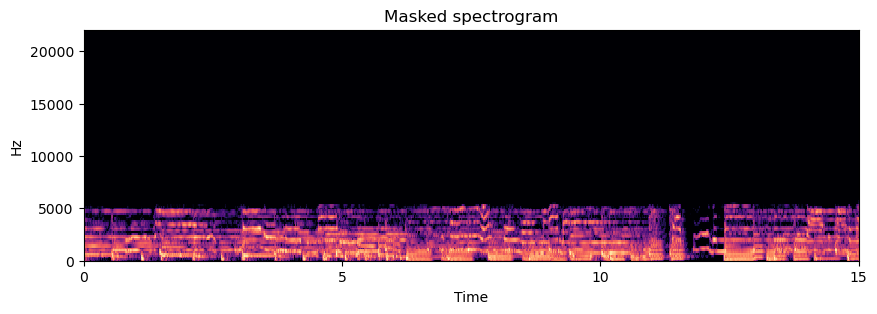

In [24]:
plt.figure(figsize=(10, 3))
plt.title('Masked spectrogram')
visualize_mel(signal1_lp)
plt.show()

In [25]:
nussl.STFTParams

nussl.core.audio_signal.STFTParams

In [26]:
signal1.stft_params

STFTParams(window_length=2048, hop_length=512, window_type='sqrt_hann')

In [27]:
nussl.constants.ALL_WINDOWS

['hamming', 'rectangular', 'hann', 'blackman', 'triang', 'sqrt_hann']

In [28]:
signal1.stft_params = nussl.STFTParams(
    window_length=256, hop_length=128)
signal1.stft().shape

(129, 5169, 2)